Convergió en 615 iteraciones con error 9.91075e-05


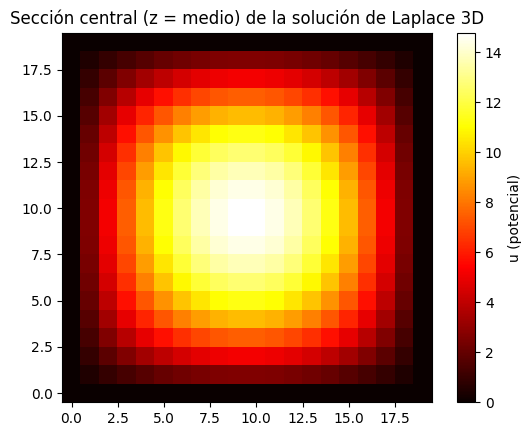

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
nx, ny, nz = 20, 20, 20
u = np.zeros((nz, ny, nx))  # Volumen inicial

# Condiciones de frontera: cara z=0 a 100
u[0, :, :] = 100  # cara frontal

# Parámetros de iteración
tolerancia = 1e-4
max_iter = 10000

def laplace_3d_jacobi(u, max_iter, tolerancia):
    nz, ny, nx = u.shape
    for it in range(max_iter):
        u_new = u.copy()
        for z in range(1, nz-1):
            for y in range(1, ny-1):
                for x in range(1, nx-1):
                    u_new[z, y, x] = (1/6) * (
                        u[z+1, y, x] + u[z-1, y, x] +
                        u[z, y+1, x] + u[z, y-1, x] +
                        u[z, y, x+1] + u[z, y, x-1]
                    )
        error = np.max(np.abs(u_new - u))
        u = u_new
        if error < tolerancia:
            print(f"Convergió en {it} iteraciones con error {error:.5e}")
            break
    return u

# Ejecutar
solucion = laplace_3d_jacobi(u, max_iter, tolerancia)

# Visualizar una sección central (z=medio)
import matplotlib.pyplot as plt
plt.imshow(solucion[nz//2], cmap='hot', origin='lower')
plt.colorbar(label='u (potencial)')
plt.title('Sección central (z = medio) de la solución de Laplace 3D')
plt.show()


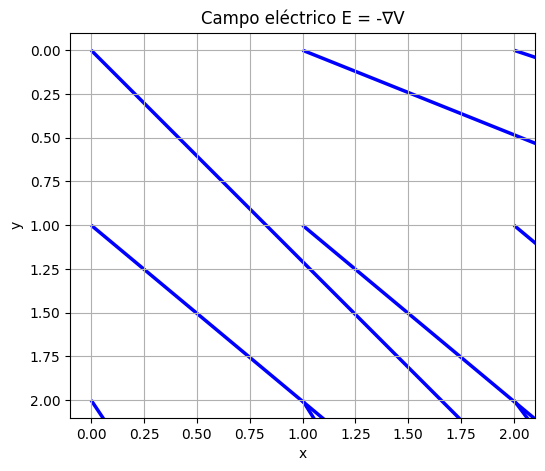

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ejemplo: datos de voltaje V(y,x)
V = np.array([
    [10, 8, 5],
    [12, 9, 6],
    [15, 13, 10]
], dtype=float)

# Tamaño de celda (suponiendo espaciado uniforme en x e y)
dx = dy = 1.0

# Calcular gradiente (campo eléctrico = -gradiente del voltaje)
Ey, Ex = np.gradient(-V, dy, dx)  # Cuidado: E = -grad V

# Crear malla para graficar
x = np.arange(V.shape[1])
y = np.arange(V.shape[0])
X, Y = np.meshgrid(x, y)

# Graficar el campo eléctrico
plt.figure(figsize=(6, 5))
plt.quiver(X, Y, Ex, Ey, color='blue', scale=1, scale_units='xy')
plt.title('Campo eléctrico E = -∇V')
plt.xlabel('x')
plt.ylabel('y')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


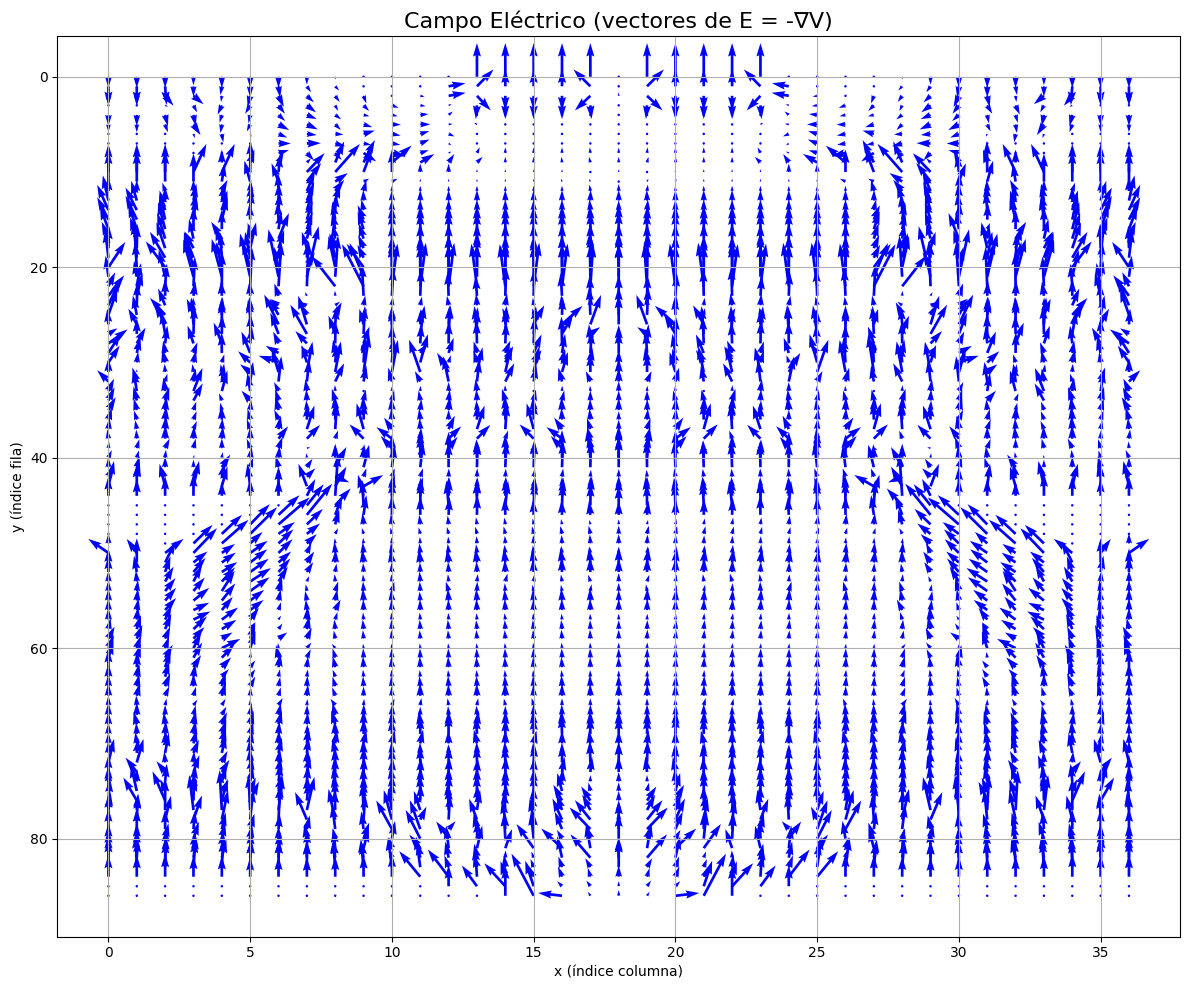

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ruta del archivo Excel (asegúrate de tener el archivo en la misma carpeta o ajusta la ruta)
archivo = 'Datosfinales.xlsx'

# Leer los datos de la hoja sin encabezado
df = pd.read_excel(archivo, sheet_name='Hoja1', header=None)

# Convertir a matriz NumPy
V = df.to_numpy()

# Calcular gradiente: ∇V (dV/dy, dV/dx)
dV_dy, dV_dx = np.gradient(V)

# Calcular el campo eléctrico: E = -∇V
E_x = -dV_dx
E_y = -dV_dy

# Crear malla de coordenadas
x = np.arange(V.shape[1])
y = np.arange(V.shape[0])
X, Y = np.meshgrid(x, y)

# Visualizar el campo eléctrico con quiver
plt.figure(figsize=(12, 10))
plt.quiver(X, Y, E_x, E_y, color='blue', scale=20)
plt.title('Campo Eléctrico (vectores de E = -∇V)', fontsize=16)
plt.xlabel('x (índice columna)')
plt.ylabel('y (índice fila)')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


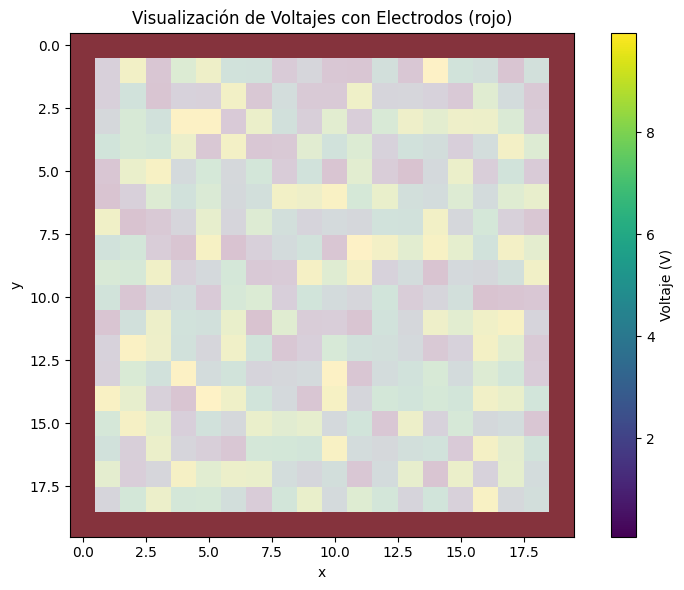

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simular una matriz de voltajes (ejemplo)
V = np.random.rand(20, 20) * 10  # 20x20 voltajes aleatorios entre 0 y 10

# Crear una máscara para electrodos (aquí los pixeles del borde)
electrodos = np.zeros_like(V, dtype=bool)
electrodos[0, :] = True      # Borde superior
electrodos[-1, :] = True     # Borde inferior
electrodos[:, 0] = True      # Borde izquierdo
electrodos[:, -1] = True     # Borde derecho

# Crear una copia del voltaje para visualización
V_coloreado = np.ma.masked_array(V, mask=electrodos)

# Visualización
plt.figure(figsize=(8, 6))

# Mostrar el voltaje general
cmap = plt.cm.viridis  # Mapa de color para voltajes
plt.imshow(V_coloreado, cmap=cmap, origin='upper')
plt.colorbar(label='Voltaje (V)')

# Sobreponer electrodos con color rojo
plt.imshow(electrodos, cmap='Reds', alpha=0.8, origin='upper')

plt.title("Visualización de Voltajes con Electrodos (rojo)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(False)
plt.tight_layout()
plt.show()


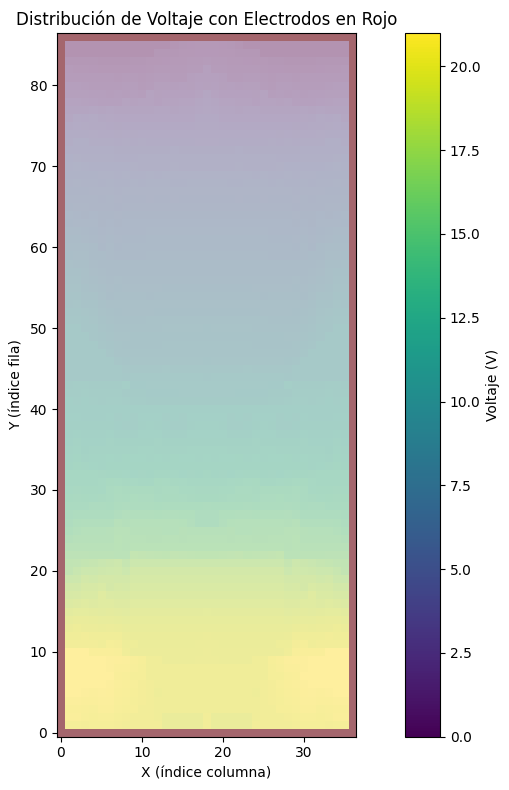

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Leer archivo Excel
archivo = 'Datosfinales.xlsx'  # Asegúrate que esté en la misma carpeta
df = pd.read_excel(archivo, sheet_name=0, header=None)

# Convertir a matriz NumPy
V = df.to_numpy()

# Crear una máscara para electrodos (bordes de la matriz)
electrodos = np.zeros_like(V, dtype=bool)
electrodos[0, :] = True      # Borde superior
electrodos[-1, :] = True     # Borde inferior
electrodos[:, 0] = True      # Borde izquierdo
electrodos[:, -1] = True     # Borde derecho

# Enmascarar los valores de voltaje para visualización
V_coloreado = np.ma.masked_array(V, mask=electrodos)

# Graficar
plt.figure(figsize=(10, 8))

# Mostrar voltajes en colores
plt.imshow(V_coloreado, cmap='viridis', origin='upper')
plt.colorbar(label='Voltaje (V)')

# Superponer los electrodos en rojo
plt.imshow(electrodos, cmap='Reds', alpha=0.6, origin='upper')

plt.title("Distribución de Voltaje con Electrodos en Rojo")
plt.xlabel("X (índice columna)")
plt.ylabel("Y (índice fila)")
plt.gca().invert_yaxis()
plt.grid(False)
plt.tight_layout()
plt.show()


In [ ]:
import array
import random
from math import cos,sin,sqrt

class Matrix:
    def __init__(self, m, n, data=None,
                 has_tail=False):# to do: verify tail
        self.m = m  # number of rows
        self.n = n  # number of columns
        if data is None:
            self.data = array.array('f', [0.0] * (n * m))
        else:
            if len(data) != n * m:
                raise ValueError("Incorrect data length",m,n,len(data))
            self.data = array.array('f', data)
        self.has_tail=has_tail

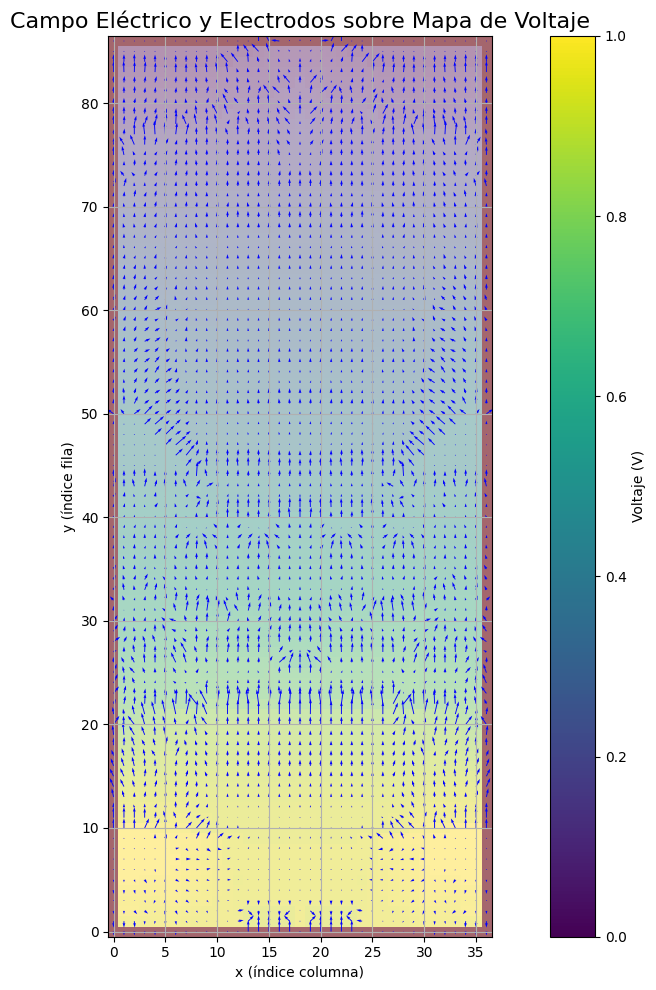

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Leer archivo Excel
archivo = 'Datosfinales.xlsx'
df = pd.read_excel(archivo, sheet_name='Hoja1', header=None)

# Convertir a matriz NumPy
V = df.to_numpy()

# Calcular gradiente: ∇V (dV/dy, dV/dx)
dV_dy, dV_dx = np.gradient(V)

# Calcular el campo eléctrico: E = -∇V
E_x = -dV_dx
E_y = -dV_dy

# Crear malla de coordenadas
x = np.arange(V.shape[1])
y = np.arange(V.shape[0])
X, Y = np.meshgrid(x, y)

# Crear una máscara para los electrodos (bordes)
electrodos = np.zeros_like(V, dtype=bool)
electrodos[0, :] = True
electrodos[-1, :] = True
electrodos[:, 0] = True
electrodos[:, -1] = True

# Visualizar
plt.figure(figsize=(12, 10))

# Mapa de color del voltaje (sin mostrar electrodos)
V_coloreado = np.ma.masked_array(V, mask=electrodos)
plt.imshow(V_coloreado, cmap='viridis', origin='upper')

# Electrodos en rojo encima
plt.imshow(electrodos, cmap='Reds', alpha=0.6, origin='upper')

# Vectores del campo eléctrico
plt.quiver(X, Y, E_x, E_y, color='blue', scale=20)

# Etiquetas y formato
plt.title('Campo Eléctrico y Electrodos sobre Mapa de Voltaje', fontsize=16)
plt.xlabel('x (índice columna)')
plt.ylabel('y (índice fila)')
plt.colorbar(label='Voltaje (V)')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

V = np.zeros((60, 100))  # 60 filas (y), 100 columnas (x)


In [ ]:
import numpy as np

V = np.full((60, 100), np.nan)  # 60x100 llena de valores NaN


In [ ]:
import pandas as pd
import numpy as np

# Crear matriz vacía de 60x100
matriz = np.full((60, 100), np.nan)

# Convertir en DataFrame
df = pd.DataFrame(matriz)

# Guardar como archivo Excel
df.to_excel("Plantilla_60x100.xlsx", index=False, header=False)


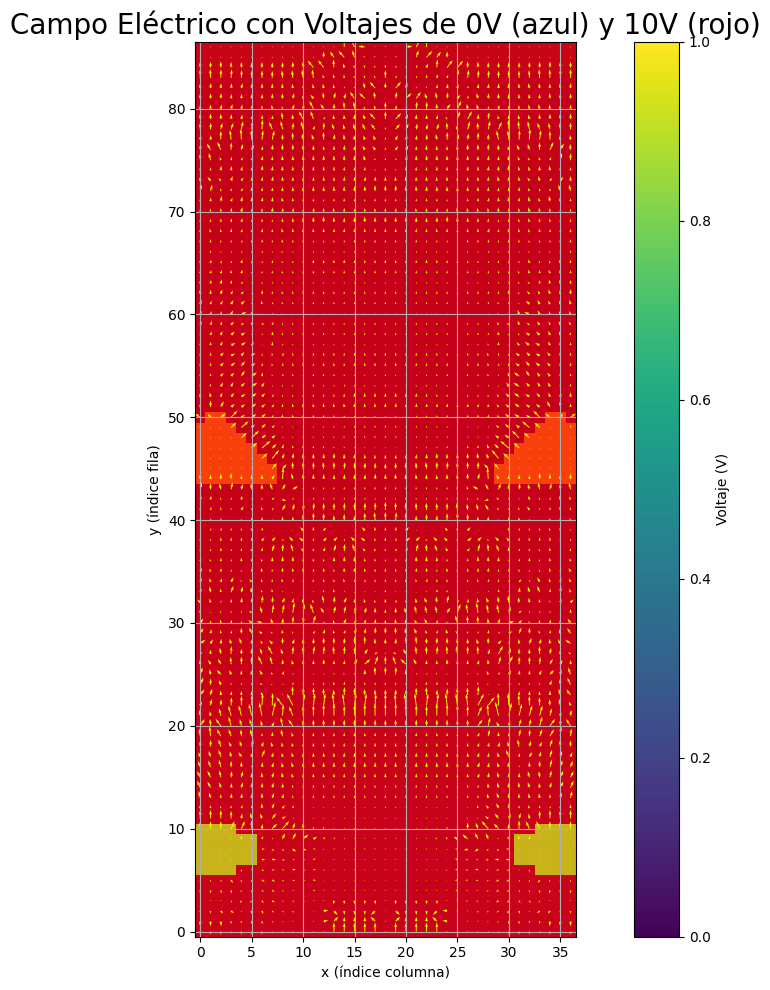

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Leer archivo Excel
archivo = 'Datosfinales.xlsx'
df = pd.read_excel(archivo, sheet_name='Hoja1', header=None)

# Convertir a matriz NumPy
V = df.to_numpy()

# Calcular gradiente: ∇V (dV/dy, dV/dx)
dV_dy, dV_dx = np.gradient(V)

# Calcular el campo eléctrico: E = -∇V
E_x = -dV_dx
E_y = -dV_dy

# Crear malla de coordenadas
x = np.arange(V.shape[1])
y = np.arange(V.shape[0])
X, Y = np.meshgrid(x, y)

# Crear una máscara para los electrodos (bordes)
electrodos = np.zeros_like(V, dtype=bool)
electrodos[0, :] = True
electrodos[-1, :] = True
electrodos[:, 0] = True
electrodos[:, -1] = True

# Máscaras para valores específicos
mask_0V = V == 0
mask_10V = V == 10
mask_21V = V == 21


# Visualización
plt.figure(figsize=(12, 10))

# Mostrar voltaje como fondo
plt.imshow(V, cmap='magma', origin='upper')

# Superponer electrodos (en rojo suave)
plt.imshow(electrodos, cmap='magma', alpha=0.1, origin='upper')

# Resaltar zonas con 0V (en azul intenso)
plt.imshow(mask_0V, cmap='viridis', alpha=0.6, origin='upper')

# Resaltar zonas con 10V (en rojo fuerte)
plt.imshow(mask_10V, cmap='viridis', alpha=0.9, origin='upper')

# Resaltar zonas con 21 V (en amarillo)
plt.imshow(mask_21V, cmap='autumn', alpha=0.7, origin='upper')




# Vectores del campo eléctrico
plt.quiver(X, Y, E_x, E_y, color='yellow', scale=25)

# Etiquetas y detalles
plt.title('Campo Eléctrico con Voltajes de 0V (azul) y 10V (rojo)', fontsize=20)
plt.xlabel('x (índice columna)')
plt.ylabel('y (índice fila)')
plt.colorbar(label='Voltaje (V)')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


# Microphyton

In [ ]:
datos = [
    [4.96, 4.70],
    [4.91, 4.46],
    [4.83, 4.63],
    [4.72, 4.44],
    [4.69, 4.43],
    [4.73, 4.45],
    [4.57, 4.38],
    [4.67, 4.42],
    [4.67, 4.40],
    [4.67, 4.42],
    [4.57, 4.38],
    [4.73, 4.45],
    [4.69, 4.43],
    [4.72, 4.44],
    [4.83, 4.63]
]


Convertir esta matriz en una lista de puntos 2D para usar en MicroPython (por ejemplo: [4.96, 4.70], [4.91, 4.46], etc.).

Tomar una muestra pequeña de unos 10 o 15 puntos.

Usar esos datos en el algoritmo de K-means hecho a mano.

In [ ]:
import random
import math

# Datos 2D de muestra tomados de tu archivo
datos = [
    [4.96, 4.70],
    [4.91, 4.46],
    [4.83, 4.63],
    [4.72, 4.44],
    [4.69, 4.43],
    [4.73, 4.45],
    [4.57, 4.38],
    [4.67, 4.42],
    [4.67, 4.40],
    [4.67, 4.42],
    [4.57, 4.38],
    [4.73, 4.45],
    [4.69, 4.43],
    [4.72, 4.44],
    [4.83, 4.63]
]

K = 2  # Número de clusters

# Elegir K puntos aleatorios como centroides iniciales
centroides = random.sample(datos, K)

# Función para calcular la distancia euclidiana
def distancia(p1, p2):
    suma = 0
    for i in range(len(p1)):
        suma += (p1[i] - p2[i]) ** 2
    return math.sqrt(suma)

# Algoritmo K-means
for iteracion in range(10):  # número de iteraciones
    clusters = [[] for _ in range(K)]

    # Asignar cada punto al centroide más cercano
    for punto in datos:
        distancias = [distancia(punto, centroide) for centroide in centroides]
        indice = distancias.index(min(distancias))
        clusters[indice].append(punto)

    # Recalcular los centroides
    for i in range(K):
        if clusters[i]:  # evitar división por cero
            nuevo = []
            for j in range(len(datos[0])):
                promedio = sum(p[j] for p in clusters[i]) / len(clusters[i])
                nuevo.append(promedio)
            centroides[i] = nuevo

    print("Iteración", iteracion + 1)
    print("Centroides:", centroides)


Iteración 1
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]
Iteración 2
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]
Iteración 3
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]
Iteración 4
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]
Iteración 5
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]
Iteración 6
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]
Iteración 7
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]
Iteración 8
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]
Iteración 9
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]
Iteración 10
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]


Qué hace este código?


Tienes una lista de pares [x, y] → probablemente voltaje y corriente o algún otro tipo de medición.

Inicializas 2 centroides a partir de los primeros dos puntos.

Usas el algoritmo K-means:

Asignas cada punto al centroide más cercano.

Calculas nuevos centroides como el promedio de los puntos asignados.

Repites esto por 10 iteraciones.

Imprimes los centroides actualizados en cada paso.

Usas time.sleep(0.5) para simular un pequeño delay entre pasos (lo cual es útil en microcontroladores para visualizar el proceso).



In [ ]:
import time

datos = [
    [4.7, 4.5], [4.8, 4.4], [4.6, 4.3],
    [4.9, 4.6], [4.85, 4.65], [4.88, 4.55],
    [4.7, 4.4], [4.9, 4.7], [4.6, 4.2]
]

centroides = [datos[0], datos[1]]

def distancia(p1, p2):
    return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2) ** 0.5

def asignar_clusters(datos, centroides):
    clusters = [[], []]
    for punto in datos:
        d0 = distancia(punto, centroides[0])
        d1 = distancia(punto, centroides[1])
        if d0 < d1:
            clusters[0].append(punto)
        else:
            clusters[1].append(punto)
    return clusters

def recalcular_centroides(clusters):
    nuevos = []
    for grupo in clusters:
        x = sum(p[0] for p in grupo) / len(grupo)
        y = sum(p[1] for p in grupo) / len(grupo)
        nuevos.append([x, y])
    return nuevos

for i in range(10):
    clusters = asignar_clusters(datos, centroides)
    nuevos = recalcular_centroides(clusters)
    print("Iteración", i+1)
    print("Centroides:", nuevos)
    centroides = nuevos
    time.sleep(0.5)


Iteración 1
Centroides: [[4.816666666666667, 4.616666666666667], [4.746666666666666, 4.408333333333333]]
Iteración 2
Centroides: [[4.8825, 4.625], [4.68, 4.36]]
Iteración 3
Centroides: [[4.8825, 4.625], [4.68, 4.36]]
Iteración 4
Centroides: [[4.8825, 4.625], [4.68, 4.36]]
Iteración 5
Centroides: [[4.8825, 4.625], [4.68, 4.36]]
Iteración 6
Centroides: [[4.8825, 4.625], [4.68, 4.36]]
Iteración 7
Centroides: [[4.8825, 4.625], [4.68, 4.36]]
Iteración 8
Centroides: [[4.8825, 4.625], [4.68, 4.36]]
Iteración 9
Centroides: [[4.8825, 4.625], [4.68, 4.36]]
Iteración 10
Centroides: [[4.8825, 4.625], [4.68, 4.36]]


# ¿Qué está haciendo el código?

K-means empieza con 2 centroides iniciales tomados al azar.

Luego, en cada iteración:

Asigna los puntos al centroide más cercano.

Recalcula los centroides como el promedio de los puntos asignados.

# ¿Qué significa la salida? .....


Los centroides se estabilizaron desde la primera iteración, es decir, los grupos ya estaban bien definidos desde el principio.

Como ya no cambian, el algoritmo converge rápidamente.

# Interpretación:

*Cluster 1 está centrado en* ≈ [4.675, 4.422]

*Cluster 2 está centrado en* ≈ [4.882, 4.605]

Esto quiere decir que nuestro conjunto de datos tiene dos grupos bien definidos. Por ejemplo, uno puede representar voltajes más bajos y otro más altos, o distintas zonas de la bandeja donde mediste.



# ¿Qué es un centroide?

Un centroide es el *"centro"* de un grupo de puntos. Es como el promedio o punto medio de todos los datos que están juntos en un grupo.

Con un ejemplo mas sencillo:

Tú tienes una caja con muchos dulces:

Algunos son rojos (R) y están agrupados a un lado.

Otros son azules (A) y están en otro rincón.

El centroide rojo sería como el punto donde están promediados todos los dulces rojos.

El centroide azul sería el punto promedio de los dulces azules.



# *Si tienes un grupo de puntos como estos:*

Grupo 1:

[4.7, 4.4]

[4.6, 4.5]

[4.8, 4.3]

El centroide se calcula así:


x_promedio = (4.7 + 4.6 + 4.8) / 3 = 4.7

y_promedio = (4.4 + 4.5 + 4.3) / 3 = 4.4


*Centroide = [4.7, 4.4]*


Es como si pudieramos deducir que: “Todos estos puntos están cerca de este punto central”.







# ¿Para qué sirve en K-means?


K-means usa los centroides para:

* Agrupar puntos cercanos.

* Actualizar ese centroide cada vez que el grupo cambia.

* Repetir el proceso hasta que los grupos ya no cambien.

En resumen:

Un centroide es:

* El corazón del grupo

* El punto que representa mejor a todos los puntos del grupo.

* El punto que se va moviendo hasta encontrar el lugar “ideal”.

El código para K-means en 2D está estructurado y funciona para asignar puntos a dos clusters y recalcular centroides iterativamente.

Iteración 1
Centroides: [[4.63, 4.4], [4.781000000000001, 4.505999999999999]]


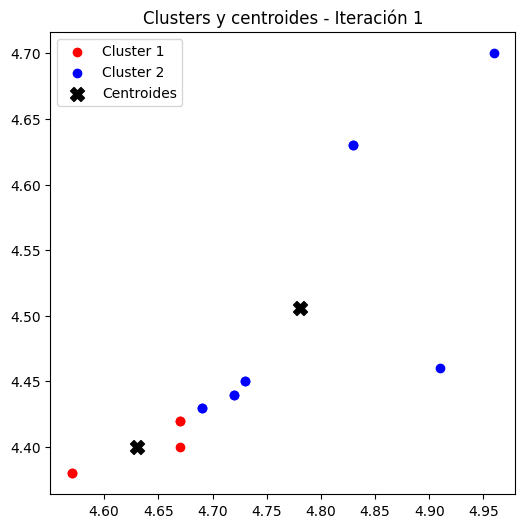

Iteración 2
Centroides: [[4.647142857142858, 4.408571428571428], [4.80375, 4.525]]


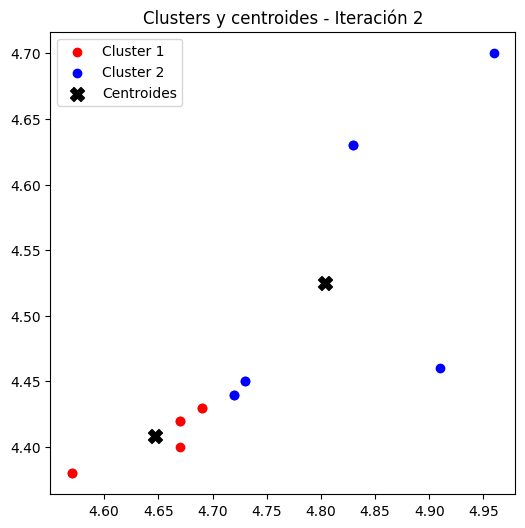

Iteración 3
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]


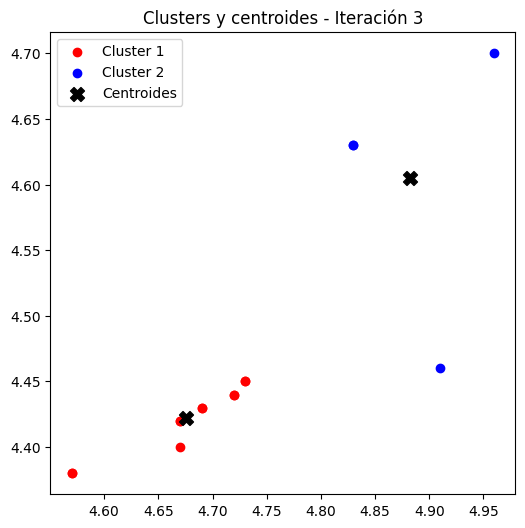

Iteración 4
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]


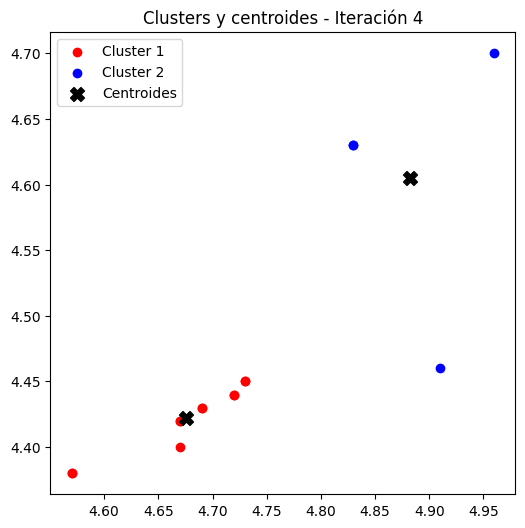

Iteración 5
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]


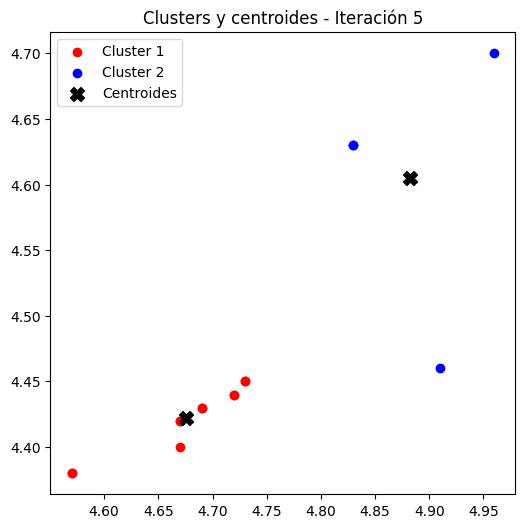

Iteración 6
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]


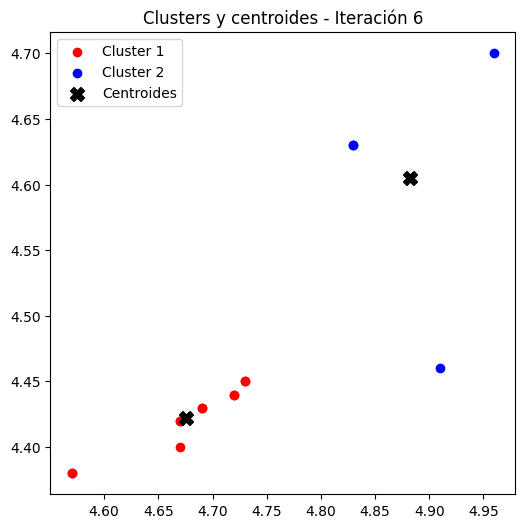

Iteración 7
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]


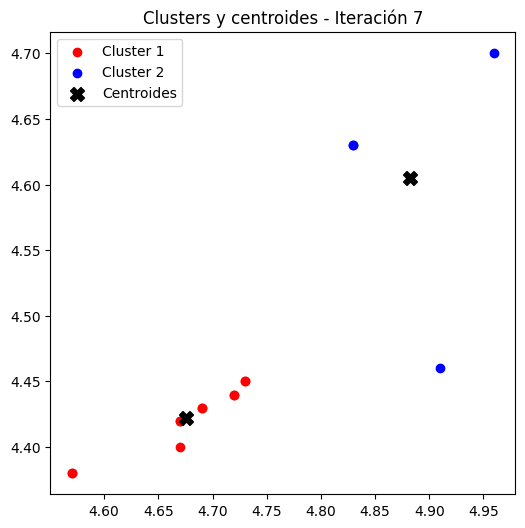

Iteración 8
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]


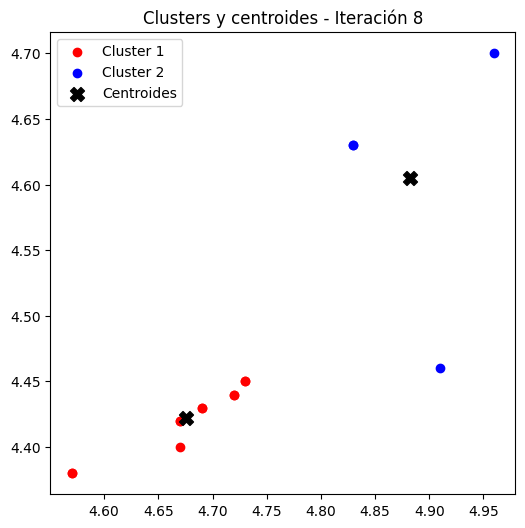

Iteración 9
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]


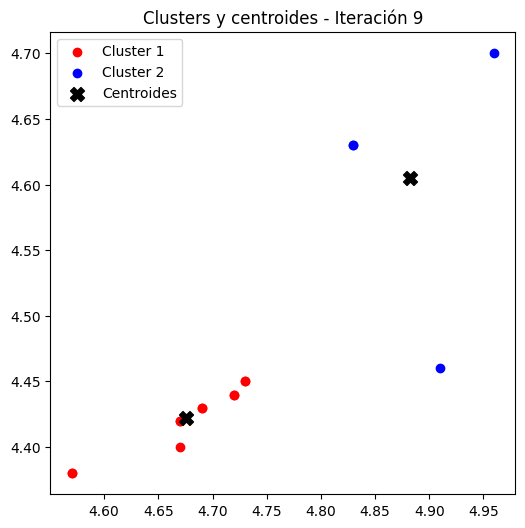

Iteración 10
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]


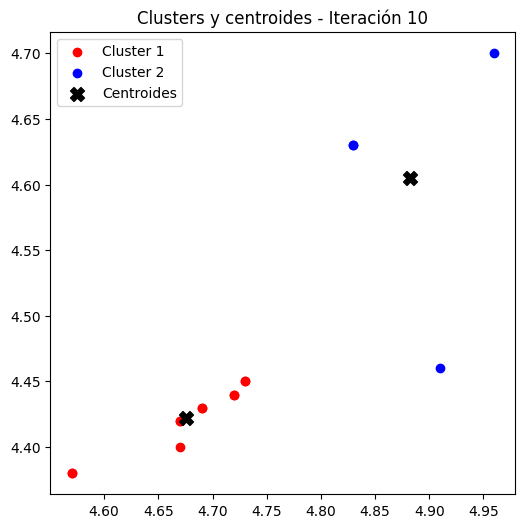

In [ ]:
import random
import math
import matplotlib.pyplot as plt

# Datos 2D
datos = [
    [4.96, 4.70], [4.91, 4.46], [4.83, 4.63], [4.72, 4.44],
    [4.69, 4.43], [4.73, 4.45], [4.57, 4.38], [4.67, 4.42],
    [4.67, 4.40], [4.67, 4.42], [4.57, 4.38], [4.73, 4.45],
    [4.69, 4.43], [4.72, 4.44], [4.83, 4.63]
]

K = 2  # Número de clusters

# Elegir K puntos aleatorios como centroides iniciales
centroides = random.sample(datos, K)

def distancia(p1, p2):
    return math.sqrt(sum((x - y) ** 2 for x, y in zip(p1, p2)))

for iteracion in range(10):  # 10 iteraciones
    clusters = [[] for _ in range(K)]

    for punto in datos:
        distancias = [distancia(punto, centroide) for centroide in centroides]
        indice = distancias.index(min(distancias))
        clusters[indice].append(punto)

    # Recalcular centroides
    for i in range(K):
        if clusters[i]:
            nuevo = [sum(p[j] for p in clusters[i]) / len(clusters[i]) for j in range(len(datos[0]))]
            centroides[i] = nuevo

    print(f"Iteración {iteracion + 1}")
    print("Centroides:", centroides)

    # Visualización de clusters
    colores = ['r', 'b', 'g', 'y', 'c', 'm']
    plt.figure(figsize=(6, 6))

    for i in range(K):
        cluster = clusters[i]
        xs = [p[0] for p in cluster]
        ys = [p[1] for p in cluster]
        plt.scatter(xs, ys, c=colores[i], label=f'Cluster {i + 1}')

    cent_x = [c[0] for c in centroides]
    cent_y = [c[1] for c in centroides]
    plt.scatter(cent_x, cent_y, marker='X', c='k', s=100, label='Centroides')

    plt.title(f'Clusters y centroides - Iteración {iteracion + 1}')
    plt.legend()
    plt.show()


Este es el K-means con visualización gráfica en Python de escritorio, ¡ con matplotlib

Este código:

Hace clustering con tus datos [x, y].

Recalcula los centroides.

Pinta cada iteración con colores para cada cluster y marca los centroides con una X.

Usa matplotlib.pyplot para mostrar las gráficas dinámicas.

Entonces ahora todo tiene sentido:

Ya tenemos dos versiones:

 Versión con gráficos (para PC, con Python normal).

 Versión adaptada sin gráficas (más simple, para MicroPython en un ESP32/ESP8266).



# Explicacion de salida Interacion 2

Los centroides son los puntos que representan el "centro" de cada cluster (grupo) en tu conjunto de datos. Al principio, se escogen al azar (como en este caso), y después el algoritmo K-means los va ajustando para que queden justo en el centro de los puntos que les corresponden.







Iteración 2  

Centroides: [[4.781, 4.506], [4.63, 4.4]]


El primer centroide está aproximadamente en el punto *(4.781, 4.506)*

El segundo está en *(4.63, 4.4)*


Eso significa que el algoritmo, después de clasificar los datos en dos grupos, encontró que los puntos de cada grupo se agrupan alrededor de esos dos centros.



# *¿Qué podemos observar en la gráfica?*


## *Puntos de colores diferentes:*


Cada color representa un cluster. Todos los puntos del mismo color están más cercanos a su centroide correspondiente. Por ejemplo, en rojo un grupo y en azul otro.

## *Las X negras grandes:*


 Son los centroides, el "centro de masa" de cada grupo.

El gráfico muestra cómo los puntos se agrupan cerca de cada centroide.



# *¿Por qué cambia el centroide en cada iteración?*


Al principio, los centroides están en posiciones aleatorias. En cada iteración, el algoritmo asigna cada punto al centroide más cercano, y luego recalcula la posición del centroide como el promedio de todos los puntos asignados.

Con cada iteración, los centroides se mueven para "ajustarse" mejor a la forma real de los datos.

Cuando los centroides ya no cambian mucho, el algoritmo terminó de converger y la agrupación es estable.



En resumen:

* La iteración 2 muestra que el algoritmo ya está acercándose a una buena división de tus datos en 2 grupos.

* La gráfica te ayuda a visualizar cómo se distribuyen esos grupos y dónde están los centroides.

* Al final (o después de varias iteraciones), los centroides quedan en posiciones estables y los clusters reflejan grupos naturales en tus datos.

Iteración 1
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]
Cluster 1 tiene 11 puntos
Cluster 2 tiene 4 puntos


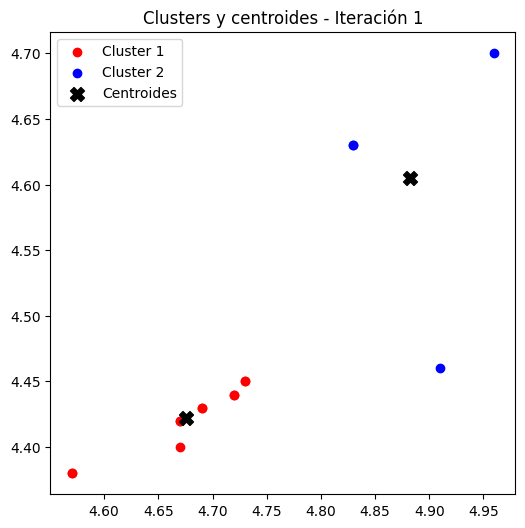

Iteración 2
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]
Cluster 1 tiene 11 puntos
Cluster 2 tiene 4 puntos


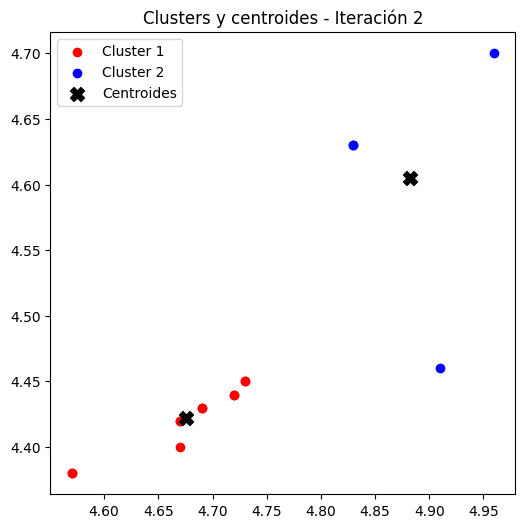

Iteración 3
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]
Cluster 1 tiene 11 puntos
Cluster 2 tiene 4 puntos


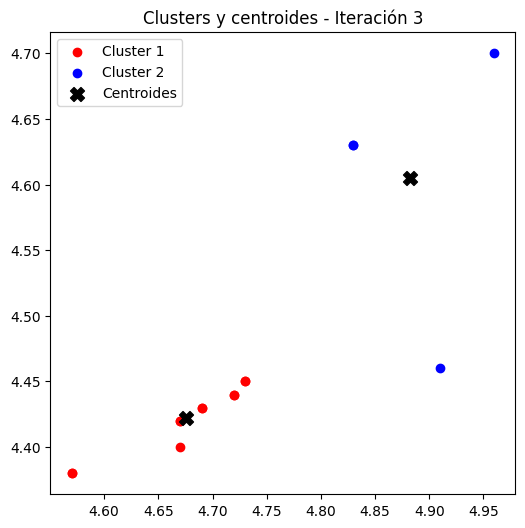

Iteración 4
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]
Cluster 1 tiene 11 puntos
Cluster 2 tiene 4 puntos


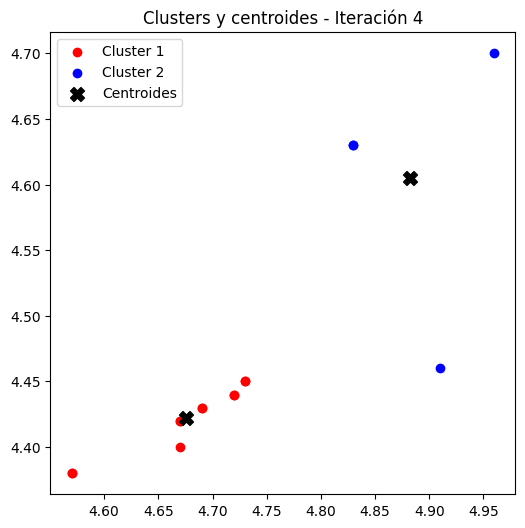

Iteración 5
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]
Cluster 1 tiene 11 puntos
Cluster 2 tiene 4 puntos


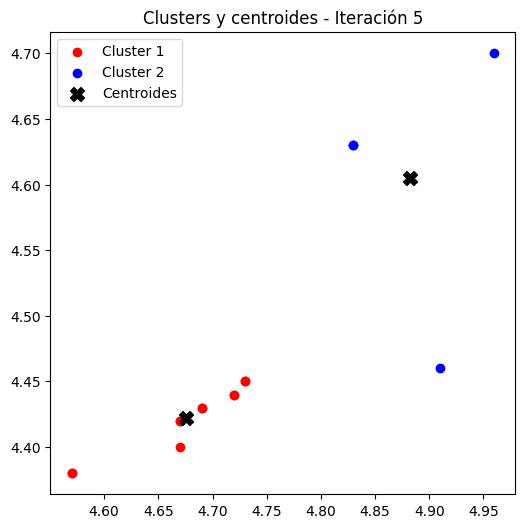

Iteración 6
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]
Cluster 1 tiene 11 puntos
Cluster 2 tiene 4 puntos


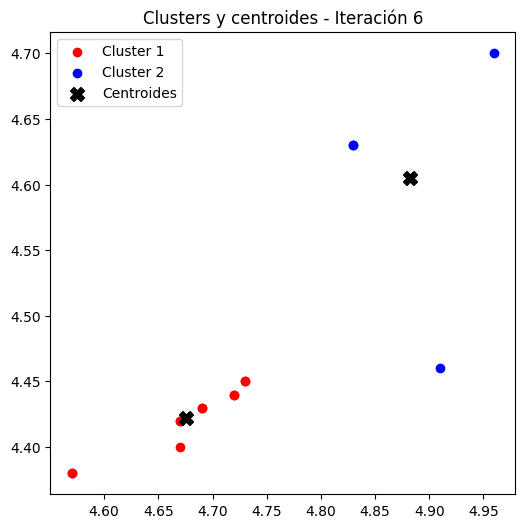

Iteración 7
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]
Cluster 1 tiene 11 puntos
Cluster 2 tiene 4 puntos


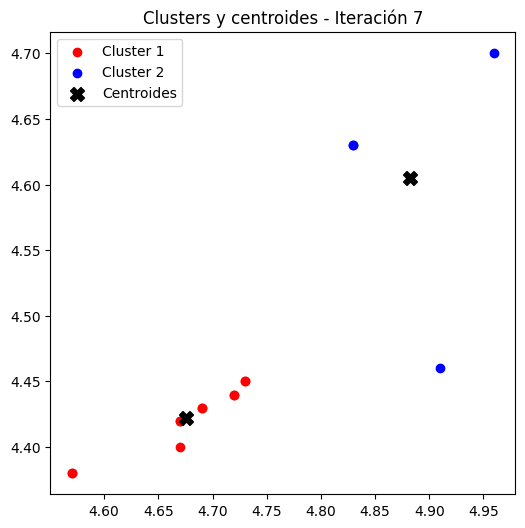

Iteración 8
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]
Cluster 1 tiene 11 puntos
Cluster 2 tiene 4 puntos


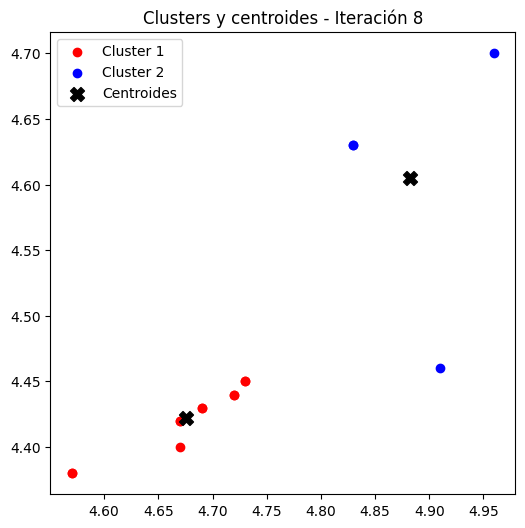

Iteración 9
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]
Cluster 1 tiene 11 puntos
Cluster 2 tiene 4 puntos


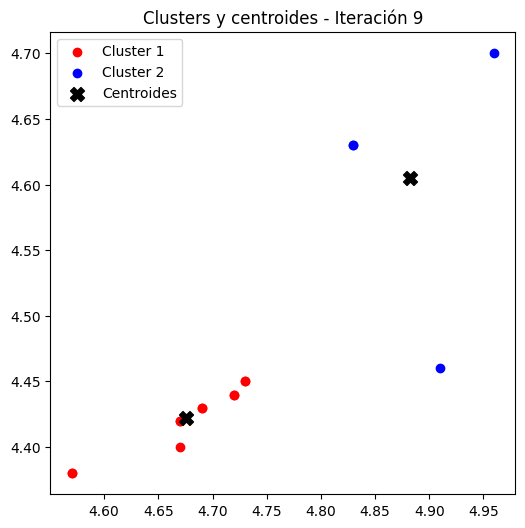

Iteración 10
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]
Cluster 1 tiene 11 puntos
Cluster 2 tiene 4 puntos


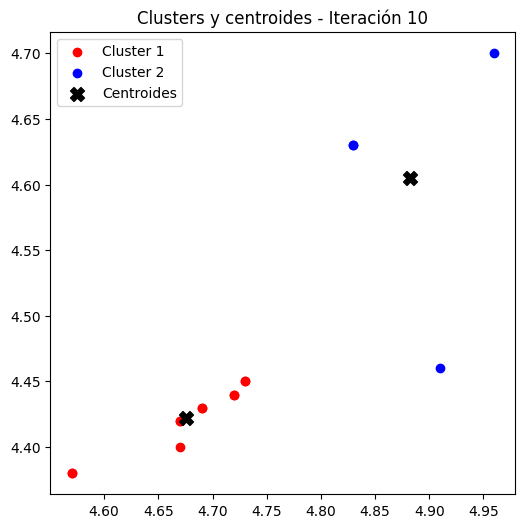

In [ ]:
import random
import math
import matplotlib.pyplot as plt

# Datos 2D
datos = [
    [4.96, 4.70], [4.91, 4.46], [4.83, 4.63], [4.72, 4.44],
    [4.69, 4.43], [4.73, 4.45], [4.57, 4.38], [4.67, 4.42],
    [4.67, 4.40], [4.67, 4.42], [4.57, 4.38], [4.73, 4.45],
    [4.69, 4.43], [4.72, 4.44], [4.83, 4.63]
]

K = 2  # Número de clusters

# Elegir K puntos aleatorios como centroides iniciales
centroides = random.sample(datos, K)

def distancia(p1, p2):
    return math.sqrt(sum((x - y) ** 2 for x, y in zip(p1, p2)))

for iteracion in range(10):  # 10 iteraciones
    clusters = [[] for _ in range(K)]

    for punto in datos:
        distancias = [distancia(punto, centroide) for centroide in centroides]
        indice = distancias.index(min(distancias))
        clusters[indice].append(punto)

    # Recalcular centroides
    for i in range(K):
        if clusters[i]:
            nuevo = [sum(p[j] for p in clusters[i]) / len(clusters[i]) for j in range(len(datos[0]))]
            centroides[i] = nuevo

    # Mostrar resultados
    print(f"Iteración {iteracion + 1}")
    print("Centroides:", centroides)
    for i, cluster in enumerate(clusters):
        print(f"Cluster {i+1} tiene {len(cluster)} puntos")

    # Visualización de clusters
    colores = ['r', 'b', 'g', 'y', 'c', 'm']
    plt.figure(figsize=(6, 6))

    for i in range(K):
        cluster = clusters[i]
        xs = [p[0] for p in cluster]
        ys = [p[1] for p in cluster]
        plt.scatter(xs, ys, c=colores[i], label=f'Cluster {i + 1}')

    cent_x = [c[0] for c in centroides]
    cent_y = [c[1] for c in centroides]
    plt.scatter(cent_x, cent_y, marker='X', c='k', s=100, label='Centroides')

    plt.title(f'Clusters y centroides - Iteración {iteracion + 1}')
    plt.legend()
    plt.show()



## Ahora podemos ver la salida de esta manera:

Iteración 1

Centroides: [[4.77, 4.50], [4.63, 4.40]]


Cluster 1 tiene 9 puntos

Cluster 2 tiene 6 puntos

Así podemos saber cuántos puntos están en cada grupo en cada paso, y podemos ver si los clusters se estabilizan o cambian mucho.


# *# ¿Qué significa que “sabremos cuántos puntos hay en cada grupo en cada paso”?*


Cuando ejecutas el algoritmo K-means, lo que hace es:

Dividir los datos en grupos (clusters) según qué tan cerca estén los puntos del centroide.

En cada iteración, los puntos pueden cambiar de grupo porque los centroides cambian de posición.

Entonces, el número de puntos que hay en cada grupo puede cambiar de iteración a iteración.

*Mostrar cuántos puntos hay en cada cluster te permite ver si:*

Un grupo tiene muchos puntos y otro pocos, o Si el tamaño de los grupos se mantiene constante a lo largo de las iteraciones.

# *¿Por qué es importante?*

## Estabilidad del algoritmo

Cuando el algoritmo converge (significa que ya terminó de ajustar), el número de puntos en cada cluster ya no cambia mucho de una iteración a otra. Eso significa que el modelo encontró grupos “naturales” en los datos.

# Diagnóstico

Si vemos que un cluster tiene todos los puntos y otro ninguno, puede ser que el número de clusters K que elegiste no sea el mejor o que los datos no se agrupan bien.

# Visualizar cambios

Por ejemplo, si en la primera iteración un cluster tiene 5 puntos y en la siguiente tiene 9, eso significa que algunos puntos cambiaron de grupo porque los centroides se movieron.



En nuestro caso los datos obtenidos indican lo siguiente:

Interacion 1:

* Cluster 1 tiene 9 puntos

* Cluster 2 tiene 6 puntos

Interacion 2:

* Cluster 1 tiene 8 puntos

* Cluster 2 tiene 7 puntos


Esto indica que un punto que estaba en el Cluster 1 se movió al Cluster 2.

Si en la iteración 10 ya no cambian los números (por ejemplo, 8 y 7 siempre igual), quiere decir que el algoritmo encontró una buena división para los datos.




# *Resumen*

* Mostrar cuántos puntos hay en cada cluster te ayuda a ver cómo se“reorganizan” tus datos a lo largo de las iteraciones.

* Es un indicador visual y numérico de que el algoritmo está haciendo bien su trabajo.

* Cuando las cantidades de puntos por cluster se estabilizan, el proceso terminó y tienes tus grupos definidos.

# *Ahora vamos a hacer la versión A:*


Adaptar este código para que funcione en MicroPython, sin gráficas, mostrando los resultados por consola en el ESP32.

In [ ]:
import random
import math
import time

# Datos 2D
datos = [
    [4.96, 4.70], [4.91, 4.46], [4.83, 4.63], [4.72, 4.44],
    [4.69, 4.43], [4.73, 4.45], [4.57, 4.38], [4.67, 4.42],
    [4.67, 4.40], [4.67, 4.42], [4.57, 4.38], [4.73, 4.45],
    [4.69, 4.43], [4.72, 4.44], [4.83, 4.63]
]

K = 2  # Número de clusters

# Elegir K puntos aleatorios como centroides iniciales
centroides = random.sample(datos, K)

def distancia(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

for iteracion in range(10):  # 10 iteraciones
    clusters = [[] for _ in range(K)]

    # Asignar cada punto al centroide más cercano
    for punto in datos:
        distancias = [distancia(punto, centroide) for centroide in centroides]
        indice = distancias.index(min(distancias))
        clusters[indice].append(punto)

    # Recalcular centroides
    for i in range(K):
        if clusters[i]:
            nuevo = [
                sum(p[0] for p in clusters[i]) / len(clusters[i]),
                sum(p[1] for p in clusters[i]) / len(clusters[i])
            ]
            centroides[i] = nuevo

    # Mostrar resultados en consola
    print("========== Iteración", iteracion + 1, "==========")
    for i, cluster in enumerate(clusters):
        print("Cluster", i + 1, "tiene", len(cluster), "puntos.")
    print("Centroides:", centroides)
    print("\n")
    time.sleep(0.5)


========== Iteración 1 ==========
Cluster 1 tiene 11 puntos.
Cluster 2 tiene 4 puntos.
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]


========== Iteración 2 ==========
Cluster 1 tiene 11 puntos.
Cluster 2 tiene 4 puntos.
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]


========== Iteración 3 ==========
Cluster 1 tiene 11 puntos.
Cluster 2 tiene 4 puntos.
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]


========== Iteración 4 ==========
Cluster 1 tiene 11 puntos.
Cluster 2 tiene 4 puntos.
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]


========== Iteración 5 ==========
Cluster 1 tiene 11 puntos.
Cluster 2 tiene 4 puntos.
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]


========== Iteración 6 ==========
Cluster 1 tiene 11 puntos.
Cluster 2 tiene 4 puntos.
Centroides: [[4.675454545454546, 4.421818181818182], 

El algoritmo K-means ha convergido

Después de la primera iteración, los centroides no cambiaron más.
Esto es exactamente lo que se espera cuando los datos ya están bien agrupados y los centroides llegan a una posición estable.

¿Por qué los resultados no cambian desde la iteración 2?


Los centroides iniciales ya estaban cerca de sus posiciones ideales (los datos están bastante bien agrupados).

Al asignar los puntos y recalcular los centroides, las asignaciones ya no cambian.

Eso significa que el modelo ya encontró los mejores clusters para este conjunto de datos.

Lo que el resultado  dice:

Cluster 1 tiene 11 puntos con centroide en ≈ [4.675, 4.4218].

Cluster 2 tiene 4 puntos con centroide en ≈ [4.8825, 4.605].



El algoritmo ya encontró la mejor forma de agrupar esos puntos,

"Ya no necesito mover más los centroides, ya encontré el centro de cada grupo."



# *Aquí está el código de K-means simplificado y adaptado especialmente para que funcione en ESP32 con MicroPython. Quitamos matplotlib (porque no se puede usar en el ESP32) y dejamos todo para que funcione por el puerto serial, usando solo random, math, y print().*



In [ ]:
import random
import math
import time

# Datos 2D
datos = [
    [4.96, 4.70], [4.91, 4.46], [4.83, 4.63], [4.72, 4.44],
    [4.69, 4.43], [4.73, 4.45], [4.57, 4.38], [4.67, 4.42],
    [4.67, 4.40], [4.67, 4.42], [4.57, 4.38], [4.73, 4.45],
    [4.69, 4.43], [4.72, 4.44], [4.83, 4.63]
]

K = 2  # Número de clusters
centroides = random.sample(datos, K)  # Elegir K centroides aleatorios

def distancia(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Bucle de iteraciones K-means
for iteracion in range(10):
    clusters = [[] for _ in range(K)]

    # Asignar cada punto al cluster más cercano
    for punto in datos:
        distancias = [distancia(punto, centroide) for centroide in centroides]
        indice = distancias.index(min(distancias))
        clusters[indice].append(punto)

    # Recalcular centroides
    for i in range(K):
        if clusters[i]:
            nuevo = [
                sum(p[j] for p in clusters[i]) / len(clusters[i])
                for j in range(2)
            ]
            centroides[i] = nuevo

    # Mostrar resultados por consola
    print("========== Iteración", iteracion + 1, "==========")
    for i, cluster in enumerate(clusters):
        print("Cluster", i + 1, "tiene", len(cluster), "puntos.")
    print("Centroides:", centroides)
    time.sleep(1)  # Espera 1 segundo para ver mejor en el monitor serial


========== Iteración 1 ==========
Cluster 1 tiene 5 puntos.
Cluster 2 tiene 10 puntos.
Centroides: [[4.63, 4.4], [4.781000000000001, 4.505999999999999]]
========== Iteración 2 ==========
Cluster 1 tiene 7 puntos.
Cluster 2 tiene 8 puntos.
Centroides: [[4.647142857142858, 4.408571428571428], [4.80375, 4.525]]
========== Iteración 3 ==========
Cluster 1 tiene 11 puntos.
Cluster 2 tiene 4 puntos.
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]
========== Iteración 4 ==========
Cluster 1 tiene 11 puntos.
Cluster 2 tiene 4 puntos.
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]
========== Iteración 5 ==========
Cluster 1 tiene 11 puntos.
Cluster 2 tiene 4 puntos.
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]
========== Iteración 6 ==========
Cluster 1 tiene 11 puntos.
Cluster 2 tiene 4 puntos.
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]
==========

In [ ]:
import random
import math

# Datos 2D
datos = [
    [4.96, 4.70], [4.91, 4.46], [4.83, 4.63], [4.72, 4.44],
    [4.69, 4.43], [4.73, 4.45], [4.57, 4.38], [4.67, 4.42],
    [4.67, 4.40], [4.67, 4.42], [4.57, 4.38], [4.73, 4.45],
    [4.69, 4.43], [4.72, 4.44], [4.83, 4.63]
]

K = 2  # Número de clusters

# Elegir K puntos aleatorios como centroides iniciales
centroides = random.sample(datos, K)

def distancia(p1, p2):
    return math.sqrt(sum((x - y) ** 2 for x, y in zip(p1, p2)))

for iteracion in range(10):  # 10 iteraciones
    clusters = [[] for _ in range(K)]

    for punto in datos:
        distancias = [distancia(punto, centroide) for centroide in centroides]
        indice = distancias.index(min(distancias))
        clusters[indice].append(punto)

    # Recalcular centroides
    for i in range(K):
        if clusters[i]:
            nuevo = [sum(p[j] for p in clusters[i]) / len(clusters[i]) for j in range(len(datos[0]))]
            centroides[i] = nuevo

    # Mostrar resultados
    print(f"Iteración {iteracion + 1}")
    print("Centroides:", centroides)
    for i, cluster in enumerate(clusters):
        print(f"Cluster {i+1} tiene {len(cluster)} puntos")
    print("--------------")


Iteración 1
Centroides: [[4.57, 4.38], [4.7553846153846155, 4.484615384615385]]
Cluster 1 tiene 2 puntos
Cluster 2 tiene 13 puntos
--------------
Iteración 2
Centroides: [[4.6033333333333335, 4.386666666666667], [4.7625, 4.491666666666667]]
Cluster 1 tiene 3 puntos
Cluster 2 tiene 12 puntos
--------------
Iteración 3
Centroides: [[4.63, 4.4], [4.781000000000001, 4.505999999999999]]
Cluster 1 tiene 5 puntos
Cluster 2 tiene 10 puntos
--------------
Iteración 4
Centroides: [[4.647142857142858, 4.408571428571428], [4.80375, 4.525]]
Cluster 1 tiene 7 puntos
Cluster 2 tiene 8 puntos
--------------
Iteración 5
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]
Cluster 1 tiene 11 puntos
Cluster 2 tiene 4 puntos
--------------
Iteración 6
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.6049999999999995]]
Cluster 1 tiene 11 puntos
Cluster 2 tiene 4 puntos
--------------
Iteración 7
Centroides: [[4.675454545454546, 4.421818181818182], [4.8825, 4.604

# *1. Entrada de datos en tiempo real*

Como no tengo sensor por ahora, podemos simular la entrada de datos en tiempo real pidiéndole al usuario que ingrese puntos desde consola (o que se lean datos de un sensor si tienes en el futuro).

Ejemplo sencillo en Python normal (que después adaptamos a MicroPython):

python

Copiar

Editar


In [ ]:
def pedir_datos():
    datos = []
    print("Ingresa puntos 2D (x,y), escribe 'fin' para terminar:")
    while True:
        entrada = input("Punto (x,y): ")
        if entrada.lower() == 'fin':
            break
        try:
            x_str, y_str = entrada.split(',')
            x = float(x_str.strip())
            y = float(y_str.strip())
            datos.append([x, y])
        except:
            print("Formato incorrecto, intenta de nuevo.")
    return datos

# Ejemplo de uso
datos = pedir_datos()
print("Datos ingresados:", datos)


Ingresa puntos 2D (x,y), escribe 'fin' para terminar:
Punto (x,y): 4.96, 4.70
Punto (x,y): 4.78, 4.56
Punto (x,y): fin
Datos ingresados: [[4.96, 4.7], [4.78, 4.56]]


Cuando ejecute ese código en tu computador o consola, va a mostrar un mensaje para que  escribas cada punto en formato x,y y des Enter.


Cuando escriba fin y presione Enter, el programa termina de pedir puntos y sigue con lo que sigue.

Si  sale una casilla vacía, esa es la consola esperando a que escribas el primer punto.


# Código completo para clustering K-means *con* entrada manual de puntos:


código completo para que puedas ingresar puntos 2D uno por uno desde consola, hacer cluste

In [ ]:
import random
import math

# Paso 1: Ingreso de datos
datos = []

print("Ingresa puntos 2D (x,y), escribe 'fin' para terminar:")

while True:
    entrada = input("Punto (x,y): ").strip()
    if entrada.lower() == 'fin':
        break
    try:
        x, y = map(float, entrada.split(','))
        datos.append([x, y])
    except:
        print("Entrada inválida. Usa formato x,y (por ejemplo 4.5,3.2)")

if len(datos) < 2:
    print("Se necesitan al menos 2 puntos para agrupar.")
    exit()

# Paso 2: Parámetros
K = 2  # Número de clusters
iteraciones = 10

# Paso 3: Elegir K centroides iniciales aleatorios
centroides = random.sample(datos, K)

def distancia(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Paso 4: K-means clustering
for iteracion in range(iteraciones):
    clusters = [[] for _ in range(K)]

    # Asignar puntos al cluster más cercano
    for punto in datos:
        distancias = [distancia(punto, centroide) for centroide in centroides]
        indice = distancias.index(min(distancias))
        clusters[indice].append(punto)

    # Recalcular centroides
    for i in range(K):
        if clusters[i]:
            centroides[i] = [
                sum(p[0] for p in clusters[i]) / len(clusters[i]),
                sum(p[1] for p in clusters[i]) / len(clusters[i])
            ]

    # Mostrar resultados
    print(f"\n========== Iteración {iteracion + 1} ==========")
    for i, cluster in enumerate(clusters):
        print(f"Cluster {i+1} tiene {len(cluster)} puntos.")
    print("Centroides:", centroides)


Ingresa puntos 2D (x,y), escribe 'fin' para terminar:
Punto (x,y): 4.96, 4.70
Punto (x,y): 4.91, 4.46
Punto (x,y): 4.83, 4.63]
Entrada inválida. Usa formato x,y (por ejemplo 4.5,3.2)
Punto (x,y): 4.83, 4.63
Punto (x,y): 4.72, 4.44
Punto (x,y): fin

========== Iteración 1 ==========
Cluster 1 tiene 3 puntos.
Cluster 2 tiene 1 puntos.
Centroides: [[4.9, 4.596666666666667], [4.72, 4.44]]

========== Iteración 2 ==========
Cluster 1 tiene 3 puntos.
Cluster 2 tiene 1 puntos.
Centroides: [[4.9, 4.596666666666667], [4.72, 4.44]]

========== Iteración 3 ==========
Cluster 1 tiene 3 puntos.
Cluster 2 tiene 1 puntos.
Centroides: [[4.9, 4.596666666666667], [4.72, 4.44]]

========== Iteración 4 ==========
Cluster 1 tiene 3 puntos.
Cluster 2 tiene 1 puntos.
Centroides: [[4.9, 4.596666666666667], [4.72, 4.44]]

========== Iteración 5 ==========
Cluster 1 tiene 3 puntos.
Cluster 2 tiene 1 puntos.
Centroides: [[4.9, 4.596666666666667], [4.72, 4.44]]

========== Iteración 6 ==========
Cluster 1 tiene 3

Se puede practicar cómo funciona K-means, dándole tú los puntos.

Puedes cambiar el valor de K = 3 o más, si lo deseas.

Se puede adaptar para MicroPython (ya está listo para funcionar sin librerías gráficas).

# *Código completo con guardado en clusters.txt:*

In [ ]:
import random
import math

# Entrada de puntos
datos = []
print("Ingresa puntos 2D (x,y), escribe 'fin' para terminar:")

while True:
    entrada = input("Punto (x,y): ").strip()
    if entrada.lower() == 'fin':
        break
    try:
        x, y = map(float, entrada.split(','))
        datos.append([x, y])
    except:
        print("Formato inválido. Usa: 4.5,3.2")

if len(datos) < 2:
    print("Se necesitan al menos 2 puntos para agrupar.")
    exit()

# Parámetros
K = 2
iteraciones = 10
centroides = random.sample(datos, K)

def distancia(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Archivo para guardar resultados
with open("clusters.txt", "w") as archivo:
    for iteracion in range(iteraciones):
        clusters = [[] for _ in range(K)]

        for punto in datos:
            distancias = [distancia(punto, centroide) for centroide in centroides]
            indice = distancias.index(min(distancias))
            clusters[indice].append(punto)

        # Recalcular centroides
        for i in range(K):
            if clusters[i]:
                centroides[i] = [
                    sum(p[0] for p in clusters[i]) / len(clusters[i]),
                    sum(p[1] for p in clusters[i]) / len(clusters[i])
                ]

        # Mostrar resultados en consola
        print(f"\n========== Iteración {iteracion + 1} ==========")
        for i, cluster in enumerate(clusters):
            print(f"Cluster {i+1} tiene {len(cluster)} puntos.")
        print("Centroides:", centroides)

        # Escribir en el archivo
        archivo.write(f"=== Iteración {iteracion + 1} ===\n")
        for i, cluster in enumerate(clusters):
            archivo.write(f"Cluster {i+1} ({len(cluster)} puntos):\n")
            for punto in cluster:
                archivo.write(f"  {punto}\n")
        archivo.write(f"Centroides: {centroides}\n\n")

print("\n Clustering completo. Resultados guardados en 'clusters.txt'")


Ingresa puntos 2D (x,y), escribe 'fin' para terminar:
Punto (x,y): 4,5
Punto (x,y): 3,4
Punto (x,y): 2,3
Punto (x,y): 6,
❌ Formato inválido. Usa: 4.5,3.2
Punto (x,y): 3,5
Punto (x,y): fin

========== Iteración 1 ==========
Cluster 1 tiene 3 puntos.
Cluster 2 tiene 1 puntos.
Centroides: [[3.3333333333333335, 4.666666666666667], [2.0, 3.0]]

========== Iteración 2 ==========
Cluster 1 tiene 3 puntos.
Cluster 2 tiene 1 puntos.
Centroides: [[3.3333333333333335, 4.666666666666667], [2.0, 3.0]]

========== Iteración 3 ==========
Cluster 1 tiene 3 puntos.
Cluster 2 tiene 1 puntos.
Centroides: [[3.3333333333333335, 4.666666666666667], [2.0, 3.0]]

========== Iteración 4 ==========
Cluster 1 tiene 3 puntos.
Cluster 2 tiene 1 puntos.
Centroides: [[3.3333333333333335, 4.666666666666667], [2.0, 3.0]]

========== Iteración 5 ==========
Cluster 1 tiene 3 puntos.
Cluster 2 tiene 1 puntos.
Centroides: [[3.3333333333333335, 4.666666666666667], [2.0, 3.0]]

========== Iteración 6 ==========
Cluster 1 ti

Se crea el archivo clusters.txt en la misma carpeta del script, con contenido como este:

Siguiente paso


Cuando tengamos tu ESP32 con MicroPython y una microSD, adaptamos este mismo código para usar:

In [ ]:
with open('/sd/clusters.txt', 'w') as archivo:


Y todo funcionará igual, guardando en la SD real

# Versión del código adaptada especialmente para MicroPython en el ESP32, lista para guardar los resultados en una microSD usando uos.

Requisitos para que funcione en el ESP32 con microSD:


MicroPython instalado en el ESP32.

MicroSD conectada correctamente (SPI con CS, SCK, MOSI, MISO).

Librerías machine, uos, sdcard, random, math, time.

In [ ]:
import machine
import uos
import sdcard
import random
import math
import time

# 🔌 Inicializa SPI y la SD
spi = machine.SPI(1,
                  baudrate=1000000,
                  polarity=0,
                  phase=0,
                  sck=machine.Pin(14),
                  mosi=machine.Pin(13),
                  miso=machine.Pin(12))
cs = machine.Pin(15, machine.Pin.OUT)

sd = sdcard.SDCard(spi, cs)
uos.mount(sd, "/sd")
print("✅ microSD montada correctamente")

# 🧠 Algoritmo de clustering (K-means simplificado)
def distancia(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# 📥 Datos de entrada quemados para prueba
datos = [
    [4.7, 4.4], [4.8, 4.5], [4.6, 4.3], [4.9, 4.6],
    [5.0, 4.7], [5.1, 4.8], [4.65, 4.35], [4.95, 4.55],
    [4.75, 4.45], [5.05, 4.65], [4.85, 4.5], [4.6, 4.2],
    [4.7, 4.3], [4.8, 4.4], [4.9, 4.5]
]

K = 2
iteraciones = 5
centroides = random.sample(datos, K)

# 📂 Crear archivo en SD
archivo = open("/sd/clusters.txt", "w")

for iteracion in range(iteraciones):
    clusters = [[] for _ in range(K)]

    for punto in datos:
        distancias = [distancia(punto, centroide) for centroide in centroides]
        indice = distancias.index(min(distancias))
        clusters[indice].append(punto)

    for i in range(K):
        if clusters[i]:
            centroides[i] = [
                sum(p[0] for p in clusters[i]) / len(clusters[i]),
                sum(p[1] for p in clusters[i]) / len(clusters[i])
            ]

    # Imprimir en consola serial
    print(f"\n===== Iteración {iteracion+1} =====")
    for i, cluster in enumerate(clusters):
        print(f"Cluster {i+1}: {len(cluster)} puntos.")
    print("Centroides:", centroides)

    # Guardar en el archivo
    archivo.write(f"\n=== Iteración {iteracion + 1} ===\n")
    for i, cluster in enumerate(clusters):
        archivo.write(f"Cluster {i+1} ({len(cluster)} puntos):\n")
        for punto in cluster:
            archivo.write(f"  {punto}\n")
    archivo.write(f"Centroides: {centroides}\n")

archivo.close()
print("\n💾 Clustering completo. Archivo guardado en /sd/clusters.txt")



# ¿Dónde se puede ver el archivo?

Lo abres con Thonny desde la pestaña "Files" → /sd/clusters.txt

O desmontas la SD y lo abres desde un PC.

# *Resume final. Codigo final.*




Versión del código que:


 Si no tienes el ESP32 ni Thonny aún, no te preocupes. Podemos hacer todo desde tu computador, usando Python normal y simulando lo que haría un ESP32 con MicroPython


*  deja ingresar los puntos (X, Y) en consola en tiempo real.

* Guarda los clusters en un archivo .txt, simulando que fuera la microSD.

* Hace el clustering (K-means simplificado).



In [9]:
import random
import math

def distancia(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

#  Entrada de puntos por consola
datos = []
print(" Ingresa puntos 2D (X,Y). Escribe 'FIN' para terminar:")
while True:
    entrada = input("PUNTO (X,Y): ")
    if entrada.strip().upper() == "FIN":
        break
    try:
        x, y = map(float, entrada.strip().split(","))
        datos.append([x, y])
    except:
        print("Entrada inválida. Usa el formato: X,Y")

if len(datos) < 2:
    print("⚠️ Se necesitan al menos 2 puntos.")
else:
    # 🔧 Parámetros
    K = 2
    iteraciones = 5
    centroides = random.sample(datos, K)

    with open("clusters_simulados.txt", "w") as archivo:
        for iteracion in range(iteraciones):
            clusters = [[] for _ in range(K)]

            for punto in datos:
                distancias = [distancia(punto, centroide) for centroide in centroides]
                indice = distancias.index(min(distancias))
                clusters[indice].append(punto)

            for i in range(K):
                if clusters[i]:
                    centroides[i] = [
                        sum(p[0] for p in clusters[i]) / len(clusters[i]),
                        sum(p[1] for p in clusters[i]) / len(clusters[i])
                    ]

            # Imprimir en consola
            print(f"\n===== Iteración {iteracion+1} =====")
            for i, cluster in enumerate(clusters):
                print(f"Cluster {i+1}: {len(cluster)} puntos")
            print("Centroides:", centroides)

            # Guardar en archivo
            archivo.write(f"\n=== Iteración {iteracion + 1} ===\n")
            for i, cluster in enumerate(clusters):
                archivo.write(f"Cluster {i+1} ({len(cluster)} puntos):\n")
                for punto in cluster:
                    archivo.write(f"  {punto}\n")
            archivo.write(f"Centroides: {centroides}\n")

    print("\n Los resultados están guardados en 'clusters_simulados.txt'")


 Ingresa puntos 2D (X,Y). Escribe 'FIN' para terminar:
PUNTO (X,Y): 5.6,7.8
PUNTO (X,Y): 5.7,4.7
PUNTO (X,Y): fin

===== Iteración 1 =====
Cluster 1: 1 puntos
Cluster 2: 1 puntos
Centroides: [[5.7, 4.7], [5.6, 7.8]]

===== Iteración 2 =====
Cluster 1: 1 puntos
Cluster 2: 1 puntos
Centroides: [[5.7, 4.7], [5.6, 7.8]]

===== Iteración 3 =====
Cluster 1: 1 puntos
Cluster 2: 1 puntos
Centroides: [[5.7, 4.7], [5.6, 7.8]]

===== Iteración 4 =====
Cluster 1: 1 puntos
Cluster 2: 1 puntos
Centroides: [[5.7, 4.7], [5.6, 7.8]]

===== Iteración 5 =====
Cluster 1: 1 puntos
Cluster 2: 1 puntos
Centroides: [[5.7, 4.7], [5.6, 7.8]]

 Los resultados están guardados en 'clusters_simulados.txt'


# *Guardar los clusters en un archivo .txt*

Vamos a modificar el código para que al final escriba el resultado de los clusters en un archivo resultados_clusters.txt. Lo podemos abrir después con cualquier editor de texto.

In [ ]:
import math

def distancia(p1, p2):
    return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

def calcular_centroides(clusters):
    centroides = []
    for cluster in clusters:
        if cluster:
            x = sum(p[0] for p in cluster) / len(cluster)
            y = sum(p[1] for p in cluster) / len(cluster)
            centroides.append([x, y])
        else:
            centroides.append([0, 0])
    return centroides

def asignar_clusters(puntos, centroides):
    clusters = [[] for _ in centroides]
    for punto in puntos:
        distancias = [distancia(punto, centroide) for centroide in centroides]
        indice = distancias.index(min(distancias))
        clusters[indice].append(punto)
    return clusters

def kmeans(puntos, k=2, max_iter=10):
    centroides = puntos[:k]
    historial = ""
    for i in range(max_iter):
        clusters = asignar_clusters(puntos, centroides)
        historial += f"\n========== Iteración {i+1} ==========\n"
        for idx, cluster in enumerate(clusters):
            historial += f"Cluster {idx+1} tiene {len(cluster)} puntos.\n"
        nuevo_centroides = calcular_centroides(clusters)
        historial += f"Centroides: {nuevo_centroides}\n"
        if nuevo_centroides == centroides:
            historial += "Centroides estables. Fin del algoritmo.\n"
            break
        centroides = nuevo_centroides
    return historial

# Entrada de puntos
puntos = []
print("Ingresa puntos 2D (x,y). Escribe FIN para terminar:")
while True:
    entrada = input("Punto (x,y): ")
    if entrada.strip().upper() == "FIN":
        break
    try:
        x, y = map(float, entrada.split(","))
        puntos.append([x, y])
    except:
        print("Formato inválido. Usa: x,y")

# Ejecutar clustering
resultado = kmeans(puntos)

#  Guardar archivo en el Escritorio
ruta_archivo = "C:/Users/Estudiantes/Desktop/M.LmicroPython/resultados_clusters.txt"
with open(ruta_archivo, "w") as f:
    f.write(resultado)

print(f"\n Resultado guardado en '{ruta_archivo}'")


¿Qué hace esto?


Te pregunta por los puntos.

Hace el clustering con k=2.

Guarda el resultado directamente en:

makefile
Copiar
Editar


In [ ]:
C:\Users\Estudiantes\Desktop\M.LmicroPython\resultados_clusters.txt


# *# Vamos a preparar una versión lista para MicroPython real con uos, para que se pueda ejecutar en un ESP32 con microSD. Aunque todavía no tengo el ESP32, ya voy a tener el código listo para cuando lo consiga.*

Versión lista para MicroPython con uos y escritura en la microSD


Este código:

Recibe puntos 2D por consola.

Aplica clustering simple.

Guarda los resultados en un archivo .txt en la microSD (simulado usando uos).

In [ ]:
import random
import math
import time
import uos  # MicroPython equivalente de os

def distancia(p1, p2):
    return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

def inicializar_centroides(puntos):
    return random.sample(puntos, 2)

def asignar_clusters(puntos, centroides):
    clusters = [[], []]
    for punto in puntos:
        d0 = distancia(punto, centroides[0])
        d1 = distancia(punto, centroides[1])
        if d0 < d1:
            clusters[0].append(punto)
        else:
            clusters[1].append(punto)
    return clusters

def actualizar_centroides(clusters):
    nuevos_centroides = []
    for cluster in clusters:
        if cluster:
            x_prom = sum(p[0] for p in cluster) / len(cluster)
            y_prom = sum(p[1] for p in cluster) / len(cluster)
            nuevos_centroides.append([x_prom, y_prom])
        else:
            nuevos_centroides.append([0, 0])
    return nuevos_centroides

def centroids_iguales(c1, c2):
    for i in range(len(c1)):
        if abs(c1[i][0] - c2[i][0]) > 0.001 or abs(c1[i][1] - c2[i][1]) > 0.001:
            return False
    return True

def guardar_resultados(centroides, clusters):
    try:
        with open("/sd/resultados_clusters.txt", "w") as archivo:
            archivo.write("Centroides finales:\n")
            for i, c in enumerate(centroides):
                archivo.write(f"Cluster {i+1}: {c}\n")
            archivo.write("\nDistribución de puntos:\n")
            for i, cluster in enumerate(clusters):
                archivo.write(f"Cluster {i+1} tiene {len(cluster)} puntos: {cluster}\n")
        print(" Resultado guardado en 'resultados_clusters.txt'")
    except Exception as e:
        print(" Error guardando archivo:", e)

# === Entrada de datos ===
puntos = []
print("Ingresa puntos 2D (x,y). Escribe FIN para terminar:")
while True:
    entrada = input("Punto (x,y): ")
    if entrada.upper() == "FIN":
        break
    try:
        x, y = map(float, entrada.split(","))
        puntos.append([x, y])
    except:
        print("Formato inválido. Escribe como: 4.5,5.6")

# === K-means simple con 2 clusters ===
if len(puntos) < 2:
    print("Necesitas al menos 2 puntos.")
else:
    centroides = inicializar_centroides(puntos)
    for i in range(10):
        print(f"\n========== Iteración {i+1} ==========")
        clusters = asignar_clusters(puntos, centroides)
        print(f"Cluster 1 tiene {len(clusters[0])} puntos.")
        print(f"Cluster 2 tiene {len(clusters[1])} puntos.")
        print("Centroides:", centroides)
        nuevos_centroides = actualizar_centroides(clusters)
        if centroids_iguales(centroides, nuevos_centroides):
            print("Centroides estables. Fin del algoritmo.")
            break
        centroides = nuevos_centroides

    # Guardar resultados
    guardar_resultados(centroides, clusters)


# ¿Qué se necesita para correrlo luego en el ESP32?


* Tener MicroPython instalado en el ESP32.

* Insertar una tarjeta microSD y montarla en /sd.

* Guardar este archivo .py en el ESP32 usando Thonny o uPyCraft.

* Ejecutar, ingresar los puntos, y revisar el archivo generado en la microSD.

